In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('lenna.png',0)

In [3]:
image.shape

(512, 512)

In [7]:
# Sobel parameters: ksize, dx, dy, ddepth
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 3)     # Sobel for horizontal edges
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 3)     # Sobel for vertical edges

# Combine the Sobel images (optional)
combined_sobel = cv2.add(sobelx, sobely)

In [8]:
thresh, binary_sobel = cv2.threshold(combined_sobel, 100, 255, cv2.THRESH_BINARY)
# Adjust threshold value as needed

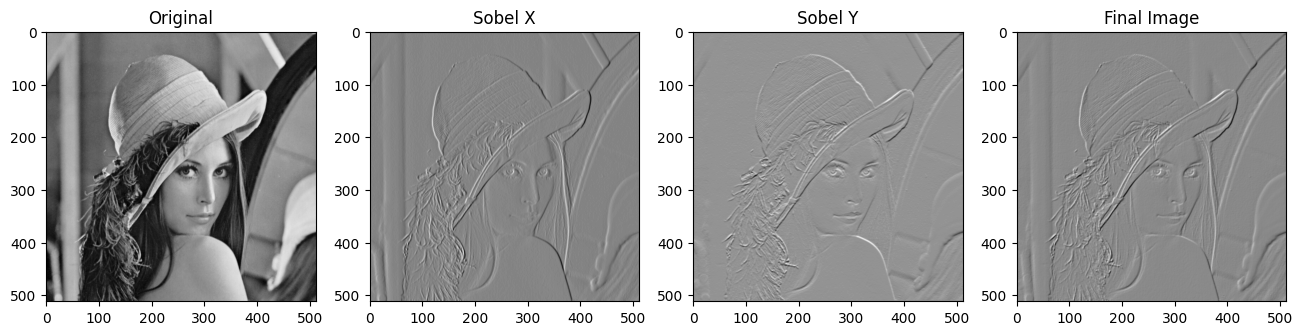

In [10]:
plt.figure(figsize = (16,8))
plt.subplot(1,4,1);
plt.title('Original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,4,2);
plt.title('Sobel X')
plt.imshow(sobelx, cmap = 'gray')
plt.subplot(1,4,3);
plt.title('Sobel Y')
plt.imshow(sobely, cmap = 'gray')
plt.subplot(1,4,4);
plt.title('Final Image')
plt.imshow(combined_sobel, cmap = 'gray')
plt.show()

### Scharr Edge Detection

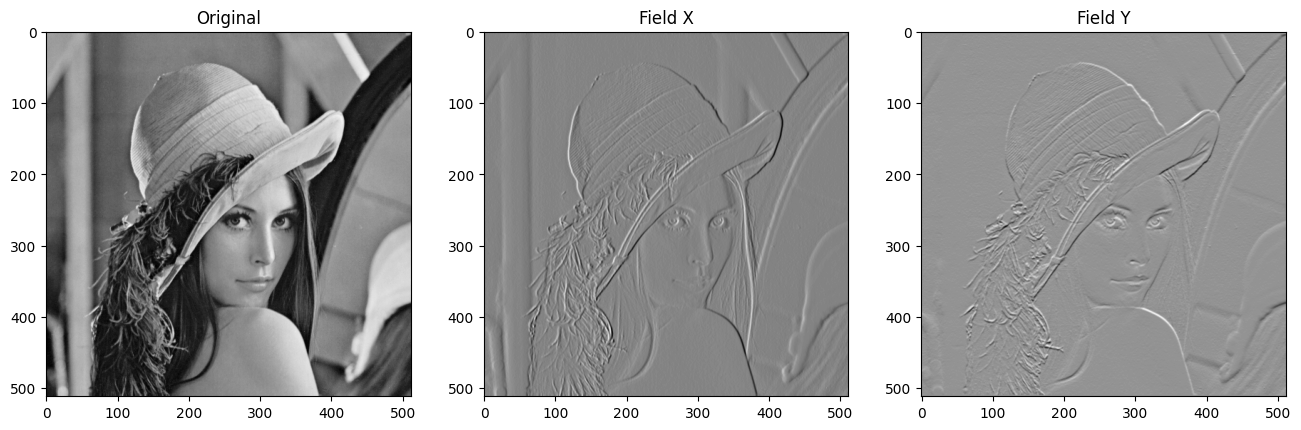

In [12]:
# X gradient Scharr ooperator
fieldx = cv2.Scharr(image, cv2.CV_32F, 1, 0) / 10.34

# Y gradient Scharr operator
fieldy = cv2.Scharr(image, cv2.CV_32F, 0, 1) / 10.34

plt.figure(figsize = (16,8))
plt.subplot(1,3,1);
plt.title('Original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,3,2);
plt.title('Field X')
plt.imshow(fieldx, cmap = 'gray')
plt.subplot(1,3,3);
plt.title('Field Y')
plt.imshow(fieldy, cmap = 'gray');

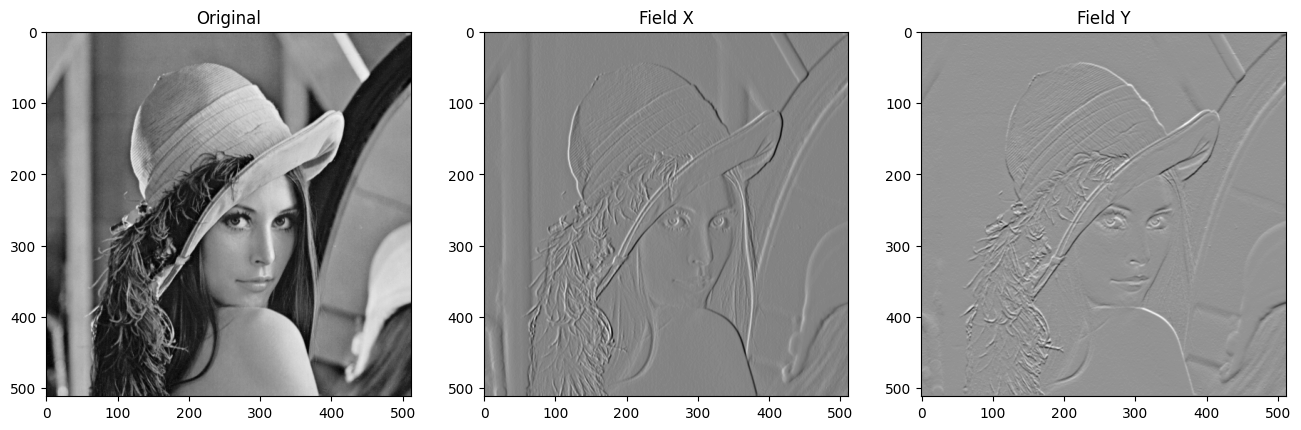

In [16]:
# X gradient Scharr ooperator
fieldx = cv2.Scharr(image, cv2.CV_32F, 1, 0) / 15.34

# Y gradient Scharr operator
fieldy = cv2.Scharr(image, cv2.CV_32F, 0, 1) / 10.34

plt.figure(figsize = (16,8))
plt.subplot(1,3,1);
plt.title('Original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,3,2);
plt.title('Field X')
plt.imshow(fieldx, cmap = 'gray')
plt.subplot(1,3,3);
plt.title('Field Y')
plt.imshow(fieldy, cmap = 'gray');

In [17]:
cv2.imshow('X Image', sobelx)
cv2.imshow('Y Image', sobely)
cv2.imshow('Combined', combined_sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Canny Edge Detection

In [19]:
img = cv2.imread('rgy.jpg', 0)

edges = cv2.Canny(img, 50, 150)

cv2.imshow('Original Image', img)
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

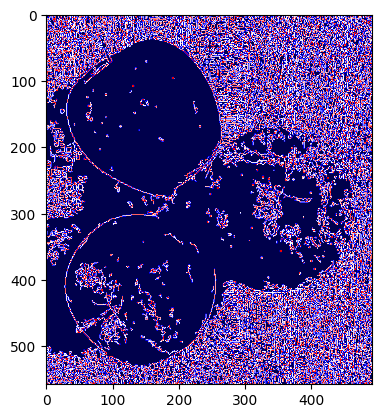

In [25]:
plt.imshow(edges, cmap = 'seismic')

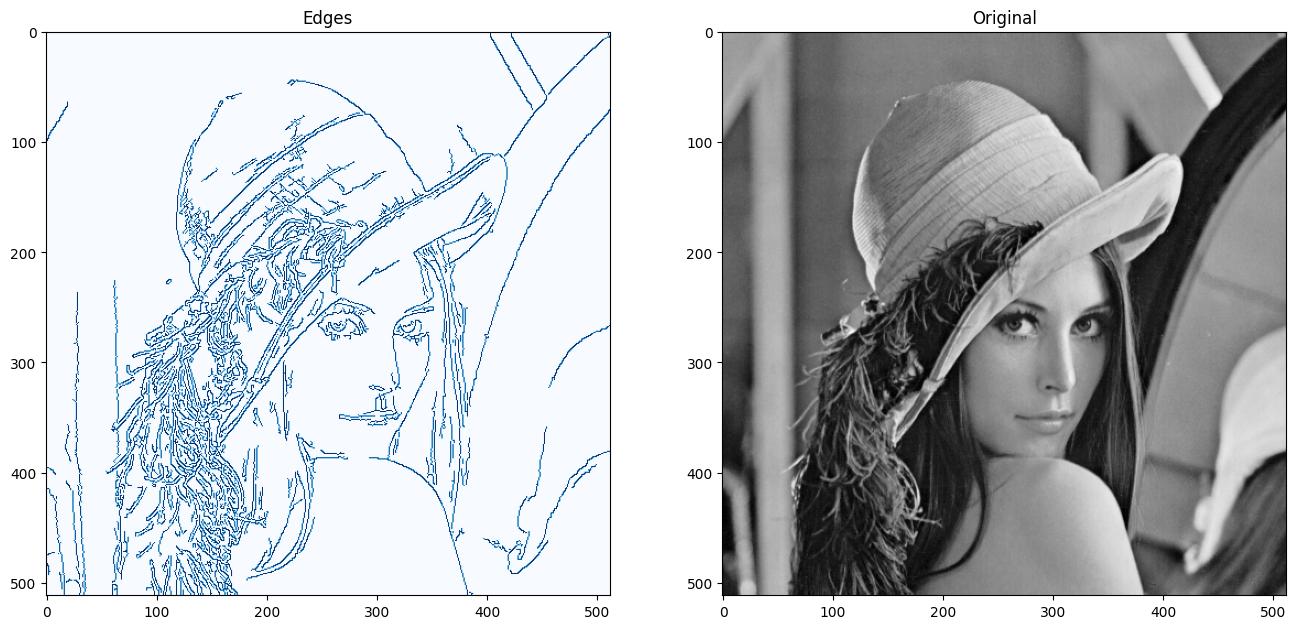

In [35]:
img = cv2.imread('lenna.png', 0)

edges = cv2.Canny(img, 50, 150)

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.title('Edges')
plt.imshow(edges, cmap = 'Blues')
plt.subplot(1,2,2)
plt.title('Original')
plt.imshow(img, cmap = 'gray')

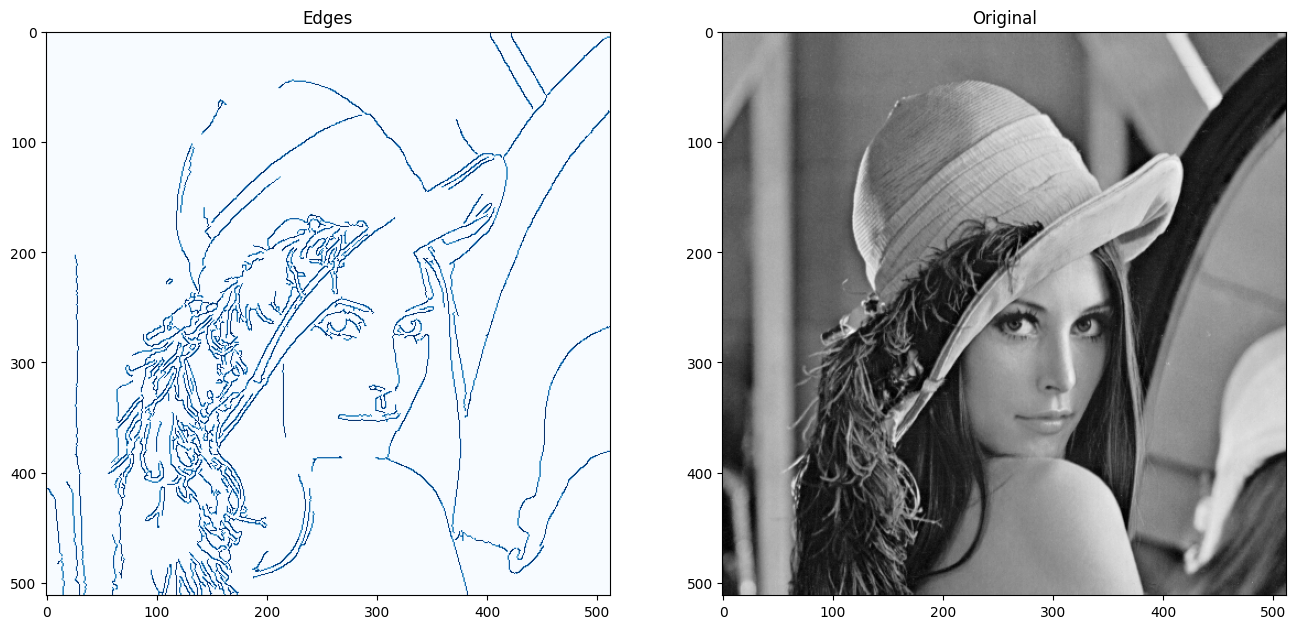

In [36]:
img = cv2.imread('lenna.png', 0)

blurred = cv2.GaussianBlur(img, (5,5),0)

edges = cv2.Canny(blurred, 50, 150)

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.title('Edges')
plt.imshow(edges, cmap = 'Blues')
plt.subplot(1,2,2)
plt.title('Original')
plt.imshow(img, cmap = 'gray')

### Contours Detection

In [39]:
#Load the Image 
img = cv2.imread('rgy.jpg')

#convert to grayscale(often better for contour detection)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a binary image where pixels above 127 are set to 255(white) and other to 0(black)
thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY)[1]

# cv2.findCountours find contours in the binary image
# cv2.RETR_TREE retrieves all contours and create a hierarchy tree.
# cv2.CHAIN_APPROX_SIMPLE approximate contours to save memory.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# -1 draws all contours.
# (0,255,0) is the color (green)
# 2 is the thickness of the lines
cv2.drawContours(img, contours, -1, (0,255,0), 2) # draw all Contours in green

# Display result
cv2.imshow('Original Image', img)
cv2.imshow('Thresholded Image', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()